#                        **Expense Stream Problem Analysis**


---


## **Introduction:**

Hey! Welcome to the analysis of the expense stream Problem! My name is Kartik ,
(ES20BTECH11015). The explanation for each step in solving the problem is given below the code blocks ,
and the necessary equations have been written in **LaTeX**

## **The Data:**

The Data has been taken from the data file present on the website, the variable $e$ is presented as a Matrix and not a Rank one Python array, so the variables we will use all must have compatible dimension. The Payout Matrix $P_{ij}$ has dimensions $(m,n)$ and the matrix e has dimensions $(n,1)$

In [ ]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
m = 29
n = 36

P = np.matrix([
 [0.166667,  0.111111,  0.083333,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.083333,  0.000000,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.083333,  0.000000,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.083333,  0.000000,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.086163,  0.000000,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.086163,  0.000000,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.086163,  0.000000,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.095840,  0.000000,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.095840,  0.000000,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.095840,  0.000000,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.109240,  0.000000,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.109240,  0.000000,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.109240,  0.000000,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.126970,  0.000000,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.126970,  0.000000,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.126970,  0.000000,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.158951,  0.000000,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.158951,  0.000000,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.158951,  0.000000,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.202873,  0.000000,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.202873,  0.000000,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.202873,  0.000000,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.278455,  0.000000,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.278455,  0.000000,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.278455,  0.000000,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.383991,  0.000000,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.383991,  0.000000,  0.740793,]
])

e = np.matrix([
  0.000000,
  1.000000,
  2.000000,
  3.000000,
  4.000000,
  5.000000,
  6.000000,
  7.000000,
  8.000000,
  16.000000,
  16.600000,
  17.200000,
  17.800000,
  18.400000,
  19.000000,
  19.600000,
  20.200000,
  18.000000,
  17.000000,
  16.000000,
  15.000000,
  14.000000,
  13.000000,
  12.000000,
  11.000000,
  10.000000,
  9.000000,
  8.000000,
  7.000000,
  6.000000,
  5.000000,
  4.000000,
  3.000000,
  2.000000,
  1.000000,
  0.000000,
]).T

rho = 0.002500

## **Variables**

The matrices $x, b, w $  represent the inital investment amount, the bank balance and the withdrawn amount respectively.

In [ ]:
x = cp.Variable((m,1))
b = cp.Variable((n,1))
w = cp.Variable((n,1))

## **Constraints**

The constraints involved are firstly , the changes of the bank balance over time described by the equation:

$b_{i+1} = b_{i}(1 + ρ) - w_{i}$

and the vales of withdrawn , invested and bank balance amounts are all nonnegative
$ ∀i \text{ } b_{i}, x_{i},w_{i} >=0  $

At every stage the expenditure cannot cross the total amount that was withdrawn 
and the payout from the investments i.e.

$ expend(t) <= withdraw(t) + \sum_{j = 1}^{j =m} payouts_{tj}* x_{j}$

 In Matrix Notion:

 $\forall t \text{ }e_{t} <= w_{t} + (P * x)_{t}$



In [ ]:
constraints = [b>=0, x>=0, w>=0]
for i in range(n-1):
    constraints += [b[i+1,0] == (1 + rho) * b[i,0] - w[i,0] ]

constraints += [w + P @ x >= e]

## **Optimization**
We need to Minimize the initila investments and sustain ourselves throughout the expense stream. The initial investments = $I_{inv}$

$I_{inv} = b_1 + \sum_{j = 1}^{j = m}  x_j$

In [ ]:
objective = cp.Minimize(b[0, 0] + cp.sum(x, axis = 0))
problem = cp.Problem(objective, constraints)
result = problem.solve()

## **Optimal Solution**

It can be seen that any negative value of $w$ is of order $10^{-8}$ so the solution has approximately non negative values.
The final answer states that the total investment needed to be made is equal to 
$197.919{$}$

In [ ]:
print("optimal value of investments=\n ", result)
print("optimal value of x = \n",x.value.T)
print("optimal value of w = \n ",w.value.T)
print("optimal value of b = \n",b.value.T)

optimal value of investments=
  197.91922192857714
optimal value of x = 
 [[3.58631211e-08 3.19384969e-08 1.98750319e-08 1.72973471e+01
  3.60192169e-08 2.05465251e-08 1.60242713e+01 4.37820645e-08
  3.25295869e-08 4.58768207e+01 4.87779095e-08 2.34310163e-08
  1.88997970e+01 2.82444275e-08 1.66726223e-08 3.22322785e+01
  4.29597819e-08 1.73321643e-08 1.21683221e+01 2.76098626e-08
  1.19883388e-08 1.32978470e+01 3.98002405e-08 1.39485166e-08
  3.92733895e+00 2.58897613e-08 1.53499004e-08 2.74071222e+00
  1.34990468e+00]]
optimal value of w = 
  [[ 1.89242943e-10  9.99999988e-01  1.99999999e+00  2.74701858e-09
   9.99999998e-01  2.00000000e+00  1.00818556e-08  1.00000001e+00
   2.00000001e+00  6.36286593e-09  3.59999999e+00  4.19999999e+00
  -9.22693028e-10  3.59999963e+00  4.19999963e+00 -1.16795306e-09
   5.39999969e+00  3.19999969e+00 -1.14928622e-09  9.99999990e-01
   1.00690907e-09 -1.18848206e-09  9.99999975e-01  2.66007625e-10
  -8.97066353e-10  4.16680265e-08 -3.92116769e-10 -2.

## **Graphical Analysis:**

Only the odd Numbered payouts have been printed on the legend of the graph,
as a sanity check we can see that the withdrawals($w$) are all smaller than the 
the expenditure($e$).

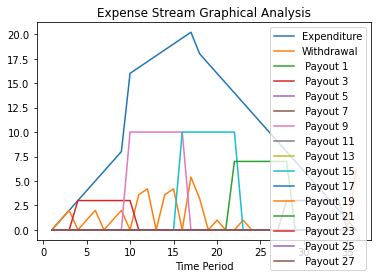

In [ ]:
t = range(1,n+1,1)
plt.plot(t,e, label = "Expenditure")
plt.plot(t,w.value, label = "Withdrawal")
for j in range(m):
    k = P[:,j] * x.value[j,0]
    format_string = f" Payout {j}"
    if(j%2 == 1):
      plt.plot(t, k, label = format_string)
plt.xlabel('Time Period')
plt.legend()
plt.title("Expense Stream Graphical Analysis")
plt.show()

## **Special Case : No initial Investments**

In this case the optimal solution is an investment of $336.54{$}$ , much greater than the previous one as clearly there is no help from the payouts.Here the bank balance and the rate of growth have to handle the entire burden of expenses. Let us see what happens on plotting. 

In [ ]:
constraints2 = constraints + [x==0]
prob2 = cp.Problem(objective, constraints2)
result2 = prob2.solve()
print("Minimum Initial investments value with x==0 = ", result2)
print("optimal value of w = \n ",w.value.T)
print("optimal value of b = \n",b.value.T)

Minimum Initial investments value with x==0 =  336.5454031016335
optimal value of w = 
  [[2.37344239e-08 1.00000001e+00 2.00000001e+00 3.00000001e+00
  4.00000001e+00 5.00000001e+00 6.00000001e+00 7.00000001e+00
  8.00000001e+00 1.60000000e+01 1.66000000e+01 1.72000000e+01
  1.78000000e+01 1.84000000e+01 1.90000000e+01 1.96000000e+01
  2.02000000e+01 1.80000000e+01 1.70000000e+01 1.60000000e+01
  1.50000000e+01 1.40000000e+01 1.30000000e+01 1.20000000e+01
  1.10000000e+01 1.00000000e+01 9.00000001e+00 8.00000001e+00
  7.00000001e+00 6.00000001e+00 5.00000001e+00 4.00000001e+00
  3.00000001e+00 2.00000002e+00 1.00000003e+00 7.36877037e+01]]
optimal value of b = 
 [[3.36545403e+02 3.37386767e+02 3.37230233e+02 3.36073309e+02
  3.33913492e+02 3.30748276e+02 3.26575147e+02 3.21391585e+02
  3.15195064e+02 3.07983051e+02 2.92753009e+02 2.76884891e+02
  2.60377104e+02 2.43228046e+02 2.25436116e+02 2.06999707e+02
  1.87917206e+02 1.68186999e+02 1.50607466e+02 1.33983985e+02
  1.18318945e+02 1

## **Graphical Analysis 2**

As you can see the ***expenditures and the withdrawal match almost completely*** throughout the time period. Therefore the sum of total expenditures is nearly equal to the initial balance! Which in-turn is equal to the $I_{inv}$ 

This completes the analysis of the problem.

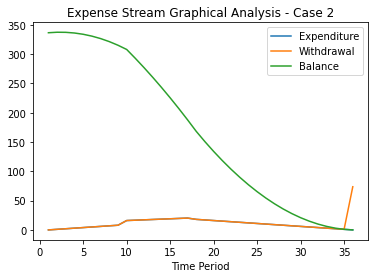

sum of expenditures =  351.79999999999995


In [ ]:
import matplotlib.pyplot as plt2

t = range(1,n+1,1)
plt2.plot(t,e, label = "Expenditure")
plt2.plot(t,w.value, label = "Withdrawal")
plt2.plot(t,b.value, label = "Balance")
plt2.xlabel('Time Period')
plt2.legend()
plt2.title("Expense Stream Graphical Analysis - Case 2")
plt2.show()
print("sum of expenditures = " ,np.sum(np.sum(e, axis = 1)))
